# Titanic Survival prediction

# Import Libraries

In [152]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,  classification_report, confusion_matrix

In [153]:
os.getcwd()

'C:\\Users\\Siddu\\..Python_datasets'

In [154]:
os.chdir('C:\\Users\\Siddu\\..Python_datasets')

# Read the file

In [155]:
Titanic = pd.read_csv('Titanic-Dataset.csv')

In [156]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [158]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [159]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [160]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [162]:
# Lets visualise countplot wrt pclass

<Axes: xlabel='Survived', ylabel='count'>

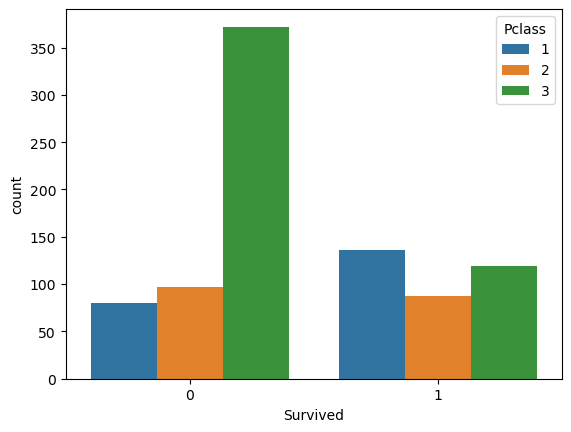

In [163]:
sns.countplot(x=Titanic['Survived'] , hue= Titanic['Pclass'])

# Identify Null values

In [164]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Drop the columns with null values

In [165]:
Titanic1 = Titanic.drop(['Age', 'Cabin'], axis=1)

In [166]:
Titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [167]:
Titanic1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Count Plot for Categorical Variables

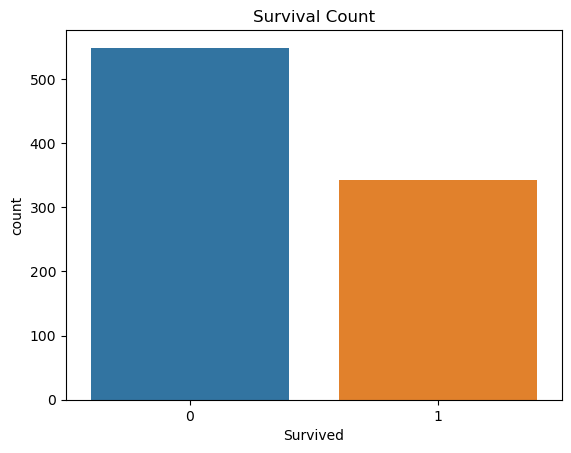

In [168]:
sns.countplot(x='Survived', data=Titanic1)
plt.title('Survival Count')
plt.show()

#  Bar Plot for Numeric and Categorical Variables


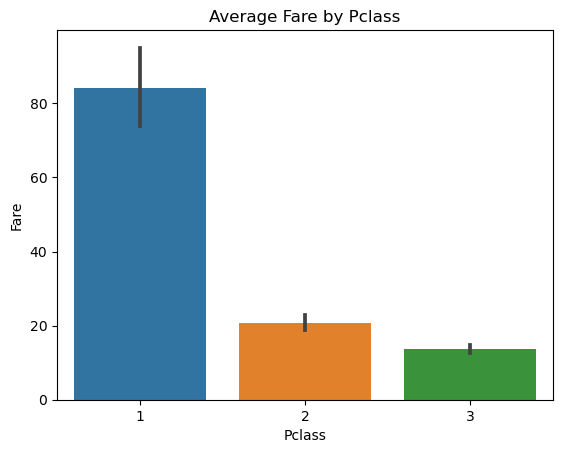

In [169]:
sns.barplot(x='Pclass', y='Fare', data=Titanic1)
plt.title('Average Fare by Pclass')
plt.show()

# Box Plot for Numeric Variables

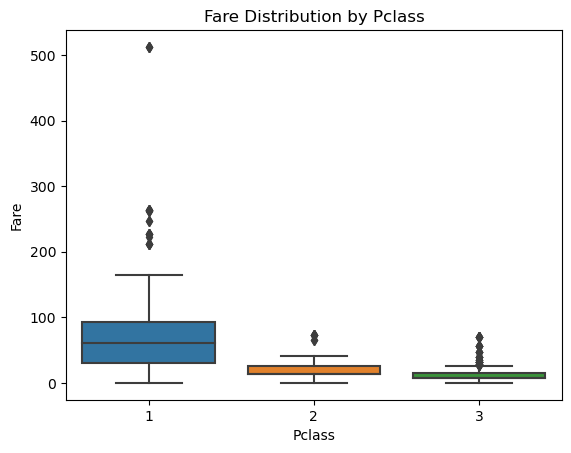

In [170]:
sns.boxplot(x='Pclass', y='Fare', data=Titanic1)
plt.title('Fare Distribution by Pclass')
plt.show()

# Logistic Regression

In [192]:
X = Titanic[['Pclass', 'Sex']]
Y = Titanic['Survived']

In [193]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

C:\Users\Siddu\AppData\Local\Temp\ipykernel_13452\598894477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


In [194]:
X_train , X_test, Y_train , Y_test = train_test_split(X, Y , test_size =0.25 , random_state = 0)

In [195]:
log_reg = LogisticRegression()

In [196]:
log_reg.fit(X_train , Y_train)

LogisticRegression()

In [197]:
Y_pred = log_reg.predict(X_test)

In [198]:
accuracy = accuracy_score(Y_test, Y_pred)

In [199]:
accuracy

0.7802690582959642

In [200]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
conf_matrix

array([[115,  24],
       [ 25,  59]], dtype=int64)

In [201]:
new_data = pd.DataFrame({
    'Pclass': [2],  
    'Sex': ['female']
})

new_data['Sex'] = new_data['Sex'].map({'male': 0, 'female': 1})

Y_new_pred = log_reg.predict(new_data)

prediction_label = 'Survived' if Y_new_pred[0] == 1 else 'Not Survived'

# Display the prediction for the new data
print("Prediction for the new data:", prediction_label)

Prediction for the new data: Not Survived


# Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
X = Titanic1.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = Titanic1['Survived']

In [185]:
X = pd.get_dummies(X)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [188]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [189]:
y_pred = random_forest.predict(X_test)

In [190]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
random_forest
accuracy

0.8156424581005587

In [191]:
conf_matrix

array([[89, 16],
       [17, 57]], dtype=int64)

# Thank you